# Author: Sandesh Basnet

# Loan Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('./Datasets/loan prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.drop('Loan_ID', axis= 1, inplace= True)

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum()*100 / len(df)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
#dropping all the values which are less than 5%
columns = ['Gender', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']
df.dropna(subset= columns, inplace= True)

In [10]:
round(df.isnull().sum()*100 / len(df), 2)

Gender               0.00
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        5.42
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       8.68
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [11]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [12]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)

In [13]:
round(df.isnull().sum()*100 / len(df))

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       9.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [14]:
df['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [15]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

In [16]:
round(df.isnull().sum()*100 / len(df))

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [17]:
df.drop_duplicates(inplace= True)

In [18]:
df.shape

(553, 12)

In [19]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
96,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
344,Male,Yes,2,Graduate,No,2583,2330.0,125.0,360.0,1.0,Rural,Y
140,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
105,Male,Yes,1,Graduate,No,3052,1030.0,100.0,360.0,1.0,Urban,Y
236,Male,Yes,0,Graduate,No,5746,0.0,255.0,360.0,1.0,Urban,N


In [20]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [21]:
df['Dependents'].replace(to_replace= '3+', value= '4', inplace= True)

In [22]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

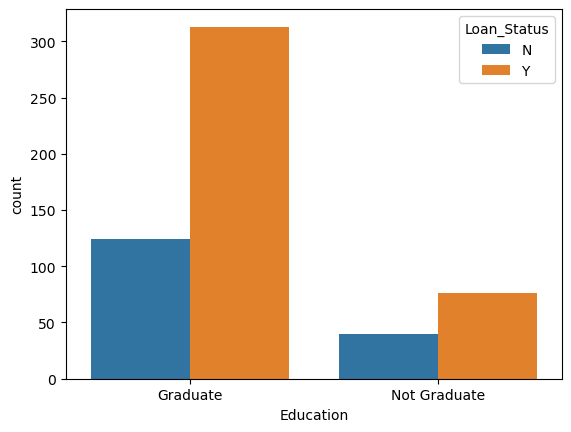

In [23]:
sns.countplot(x= 'Education', hue= 'Loan_Status', data= df)
plt.show()

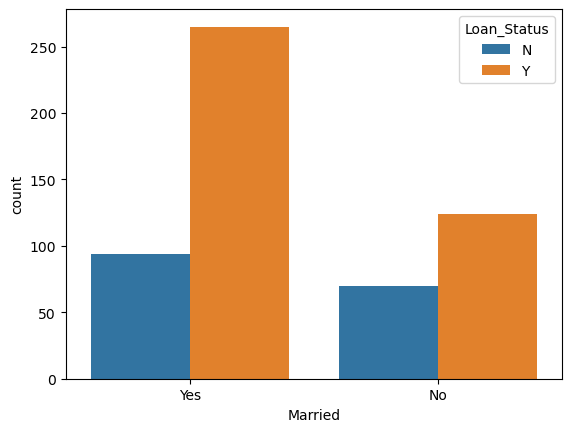

In [24]:
sns.countplot(x= 'Married', hue= 'Loan_Status', data= df)
plt.show()

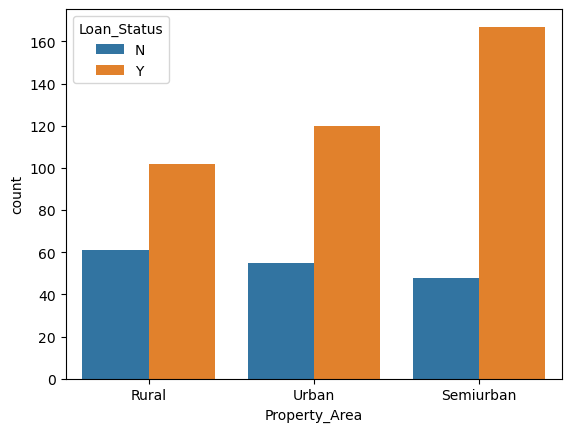

In [25]:
sns.countplot(x= 'Property_Area', hue= 'Loan_Status', data= df)
plt.show()

In [26]:
# another way to encode
#df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      #'Property_Area':{'Rural':0,'Semiurban':2,'Urban':1},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [27]:
df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
to_encode = ['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education', 'Loan_Status']

In [30]:
encoders = {}
for encodee in to_encode:
    encoders[encodee] = LabelEncoder()

In [31]:
encoders

{'Gender': LabelEncoder(),
 'Married': LabelEncoder(),
 'Self_Employed': LabelEncoder(),
 'Property_Area': LabelEncoder(),
 'Education': LabelEncoder(),
 'Loan_Status': LabelEncoder()}

In [32]:
for each_encoder in encoders.keys():
    df[each_encoder] = encoders[each_encoder].fit_transform(df[each_encoder])

In [33]:
#df['Gender'] = df['Gender'].map({'Male':1, 'Female':0}).astype('int')
#df['Married'] = df['Married'].map({'Yes':1, 'No':0}).astype('int')
#df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0}).astype('int')
#df['Property_Area'] = df['Property_Area'].map({'Rural':1, 'Urban':0, 'Semiurban': 2}).astype('int')
#df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0}).astype('int')
#df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0}).astype('int')

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [35]:
X = df.drop(['Loan_Status'], axis= 1,)
y = df['Loan_Status']

In [36]:
df['Loan_Status'].value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

# Checking accuracy using different models

In [37]:
def model_val(model, X, y):
    X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                       test_size= 0.2,
                                                       stratify=y)
    scaler= StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model} report is {classification_report(y_test, y_pred)}')

In [38]:
model = svm.SVC()
model_val(model,X,y)

SVC() report is               precision    recall  f1-score   support

           0       0.86      0.36      0.51        33
           1       0.78      0.97      0.87        78

    accuracy                           0.79       111
   macro avg       0.82      0.67      0.69       111
weighted avg       0.81      0.79      0.76       111



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = LogisticRegression()
model_val(model, X, y)

LogisticRegression() report is               precision    recall  f1-score   support

           0       0.91      0.30      0.45        33
           1       0.77      0.99      0.87        78

    accuracy                           0.78       111
   macro avg       0.84      0.65      0.66       111
weighted avg       0.81      0.78      0.74       111



In [41]:
model = RandomForestClassifier()
model_val(model, X, y)

RandomForestClassifier() report is               precision    recall  f1-score   support

           0       0.79      0.33      0.47        33
           1       0.77      0.96      0.86        78

    accuracy                           0.77       111
   macro avg       0.78      0.65      0.66       111
weighted avg       0.78      0.77      0.74       111



In [42]:
model = DecisionTreeClassifier()
model_val(model, X, y)

DecisionTreeClassifier() report is               precision    recall  f1-score   support

           0       0.45      0.67      0.54        33
           1       0.82      0.65      0.73        78

    accuracy                           0.66       111
   macro avg       0.64      0.66      0.63       111
weighted avg       0.71      0.66      0.67       111



# Saving the best model

In [43]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size= 0.2,
                                                   stratify=y)

In [44]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
logistic = LogisticRegression()

In [46]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred_logistic = logistic.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.85      0.33      0.48        33
           1       0.78      0.97      0.86        78

    accuracy                           0.78       111
   macro avg       0.81      0.65      0.67       111
weighted avg       0.80      0.78      0.75       111



# Predictive Model

In [49]:
import joblib

In [50]:
joblib.dump(logistic, 'Loan Prediction_prediction.pkl')

['Loan Prediction_prediction.pkl']

In [51]:
model = joblib.load('Loan Prediction_prediction.pkl')

In [52]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [53]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [54]:
result = logistic.predict(df)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [55]:
if result == 0:
    print('Loan declined')
else:
    print('Loan approved')

Loan declined
